In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,SMOTENC
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn import svm

#Importing the ML algorithms
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#Importing accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [2]:
#Reading the data
df=pd.read_csv(r'.\Processed Data\final_data_preprocd.csv')

In [3]:
#generating list of columns
features=['age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'gender_1', 'admission_type_id_3', 'admission_type_id_4',
       'admission_type_id_5', 'discharge_disposition_id_2',
       'discharge_disposition_id_5', 'discharge_disposition_id_7',
       'discharge_disposition_id_10', 'discharge_disposition_id_11',
       'discharge_disposition_id_18', 'discharge_disposition_id_19',
       'discharge_disposition_id_20', 'discharge_disposition_id_27',
       'discharge_disposition_id_28', 'admission_source_id_4',
       'admission_source_id_7', 'admission_source_id_8',
       'admission_source_id_9', 'admission_source_id_11', 'max_glu_serum_0',
       'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 'diag_cat_Diabetes',
       'diag_cat_Digestive', 'diag_cat_Genitourinary', 'diag_cat_Injury',
       'diag_cat_Musculoskeletal', 'diag_cat_Neoplasms', 'diag_cat_Other',
       'diag_cat_Respiratory', 'AfricanAmerican', 'Asian', 'Caucasian',
       'Hispanic', 'Other']

In [4]:
# Seperating the target variable and the feature dataset
X=df[features]
y=df['readmitted']

In [5]:
# separating list of categorical columns and numerical 
num_columns=[]
cat_columns=[]
for i in X.columns:
    unq_var=len(X[str(i)].value_counts()) # Counting the number of categories in the dataset
    if(unq_var>2):
        num_columns.append(i)
    else:
        cat_columns.append(i)

### Using Chi Square test to understand which categorical features have an impact on the target variable

In [6]:
p_value=[]
test_res=[]
for i in cat_columns:    
    if chi2_contingency(pd.crosstab(y, X[i]))[1] < 0.05: # Using crossstab to generate contingency table , Perform hypothesis and
        #compare with threshold
        test_res.append('Reject Null Hypothesis')  
    else:
        test_res.append('Fail to Reject Null Hypothesis')  
df_chi_test=pd.DataFrame()
df_chi_test['columns']=cat_columns
df_chi_test['Hyothises_res']=test_res

* THe Null Hypothesis states that the categories have no significant difference in the target variable , hence rejecting the null hypothesis means the variables are significant

In [7]:
df_chi_test[df_chi_test['Hyothises_res']=='Reject Null Hypothesis'] # Subsetting the results for significant results

,columns,Hyothises_res
0,metformin,Reject Null Hypothesis
1,repaglinide,Reject Null Hypothesis
6,glipizide,Reject Null Hypothesis
15,insulin,Reject Null Hypothesis
21,change,Reject Null Hypothesis
22,diabetesMed,Reject Null Hypothesis
24,admission_type_id_3,Reject Null Hypothesis
27,discharge_disposition_id_2,Reject Null Hypothesis
30,discharge_disposition_id_10,Reject Null Hypothesis
31,discharge_disposition_id_11,Reject Null Hypothesis


* The columns have an impact on the target variable readmitted  significantly enough 

### Performing ANOVA to test the difference in numerical variables

In [8]:
num_columns

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [9]:
feature=[]
test_res=[]
for i in num_columns:
    feature.append(i)
    zero_stat=df[df['readmitted']==0]['{}'.format(i)] # SUbsetting the feautre set for the two categories of output variables
    one_stat=df[df['readmitted']==1]['{}'.format(i)]
    f, p = stats.f_oneway(zero_stat,one_stat)
    if p<0.05:
        test_res.append('feature is significant')
    else:
        test_res.append('feature dosent have significant impact on result')
df_anova=pd.DataFrame()
df_anova['features']=feature
df_anova['result']=test_res

In [10]:
df_anova

,features,result
0,age,feature is significant
1,time_in_hospital,feature is significant
2,num_lab_procedures,feature is significant
3,num_procedures,feature dosent have significant impact on result
4,num_medications,feature is significant
5,number_outpatient,feature is significant
6,number_emergency,feature is significant
7,number_inpatient,feature is significant
8,number_diagnoses,feature is significant


* as we can observe num_procedures does not have a significant difference between admittted and readmitted categories

### Establishing baseline performance using the different models 
* SMOTE and oversmapling will be used to balance the imbalance in target variable class

In [11]:
# Generating Oversampled dataset manually 
df_readmit_yes=df[df['readmitted']==1]
df_readmit_no=df[df['readmitted']==0]
# Generating training data by takind n1/2 from both 0,1 categories
df_readmit_yes_train=df_readmit_yes.sample(frac=0.5,random_state=12)
df_readmit_no_train=df_readmit_no.sample(df_readmit_yes_train.shape[0],random_state=12)
n_req_index=df_readmit_yes_train.index # indexes of values already presentin the dataset
df_readmit_yes_test=df_readmit_yes.drop(list(n_req_index),axis=0) # dropping the already present indexes for validation dataset
df_readmit_no_sample=df_readmit_no.drop(list(df_readmit_no_train.index),axis=0) # dropping the rows present in training dataset
df_readmit_no_test=df_readmit_no_sample.sample(frac=0.5,random_state=12) # Sampling from fresh data to generate test df


In [12]:
# Subsetting the features to generate X_train,test,Y_train,Y_test 
X_train_man=pd.concat([df_readmit_yes_train,df_readmit_no_train])[features]
y_train_man=pd.concat([df_readmit_yes_train,df_readmit_no_train])['readmitted']
X_test_man=pd.concat([df_readmit_yes_test,df_readmit_no_test])[features]
y_test_man=pd.concat([df_readmit_yes_test,df_readmit_no_test])['readmitted']

### Using SMOTE To remove imbalance in the target variable
* Splitting the data into training and testing set with 20% values in the testing set
* generate synthetic data using SMOTE on training dataset and validatiing on smote dataset 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80) # Splitting into train and test set
smt = SMOTE(random_state=20)  
X_smote, y_smote = smt.fit_resample(X_train, y_train) #Resampling data in the training set 

## Evaluating Models 

In [14]:
#Generating Model Objects 
kn=KNeighborsClassifier(n_neighbors=5,)
lgr_cl = LogisticRegression(random_state=1280,penalty='l2',solver='newton-cholesky',max_iter=100)
xgb_cl = xgb.XGBClassifier()
rf_cl=RandomForestClassifier(n_estimators=10,max_depth=25,criterion='gini',min_samples_split=10)
gnb = GaussianNB()

In [15]:
# Defining to run different models and generate the evaluation metrics
def model_eval_metrics(model_obj,train_X,train_y,test_X,test_y,model_name,pred_dict):    
    model_obj.fit(train_X,train_y)
    y_pred=model_obj.predict(test_X)
    pred_dict[model_name]=list(y_pred)
    rec=recall_score(test_y, y_pred)
    acc_score=accuracy_score(test_y, y_pred)
    f1_scre=f1_score(test_y, y_pred)
    precision_ppv=precision_score(test_y, y_pred)
    specificity=recall_score(test_y, y_pred,pos_label=0)
    # return the claculated performance metrics
    return rec,acc_score,f1_scre,precision_ppv,specificity,pred_dict

In [16]:
model_dict={'KNN':kn,'Naive Bayes':gnb,'Random Forest':rf_cl,'XGBoost':xgb_cl,'Logistic Regression':lgr_cl
}# creating a dictionary of model objects 

In [17]:
list(model_dict.keys())

['KNN', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Logistic Regression']

### Performance metrics for SMOTE

In [18]:
acc=[]
recall=[]
prec=[]
spec=[]
f1=[]
pred_dic={}
for i in list(model_dict.keys()):
    print('Performing Evaluation for {}'.format(i))
    r,a,f,p,s,pred_vals=model_eval_metrics(model_dict[i],X_smote,y_smote,X_test,y_test,i,pred_dic)
    acc.append(a)
    recall.append(r)
    prec.append(p)
    f1.append(f)
    spec.append(s)

Performing Evaluation for KNN
Performing Evaluation for Naive Bayes
Performing Evaluation for Random Forest
Performing Evaluation for XGBoost
Performing Evaluation for Logistic Regression


In [19]:
pred_vals.keys()

dict_keys(['KNN', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Logistic Regression'])

In [20]:
# Intiliasing a datafrmae to store metrics evaluated through SMOTE
df_smote_res=pd.DataFrame()
df_smote_res['Models']=list(model_dict.keys())
df_smote_res['Accuracy']=acc
df_smote_res['Precision(PPV)']=prec
df_smote_res['F1 Score']=f1
df_smote_res['recall']=recall
df_smote_res['Specificity']=spec

In [21]:
df_smote_res

,Models,Accuracy,Precision(PPV),F1 Score,recall,Specificity
0,KNN,0.566298,0.092621,0.152598,0.432956,0.579516
1,Naive Bayes,0.385546,0.091229,0.159960,0.648627,0.359465
2,Random Forest,0.843654,0.111966,0.108804,0.105816,0.916800
3,XGBoost,0.837826,0.117647,0.120158,0.122779,0.908712
4,Logistic Regression,0.811016,0.104895,0.121869,0.145396,0.877002


In [22]:
df_smote_res.to_csv(r'.\Results\model_smote_results.csv',index=False)

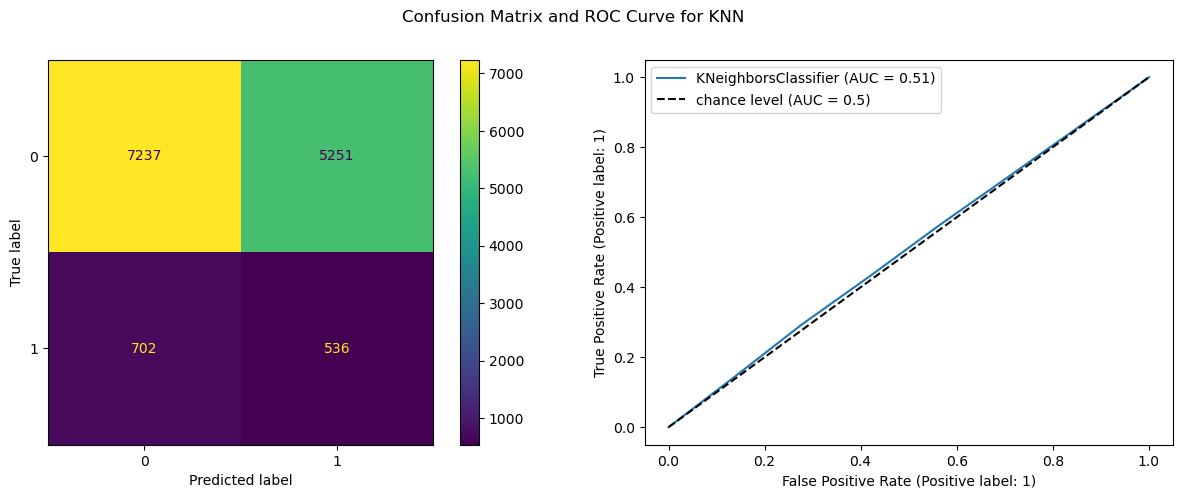

In [23]:

# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for KNN')

cm = confusion_matrix(y_test,pred_vals['KNN'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict['KNN'], X_test, y_test,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


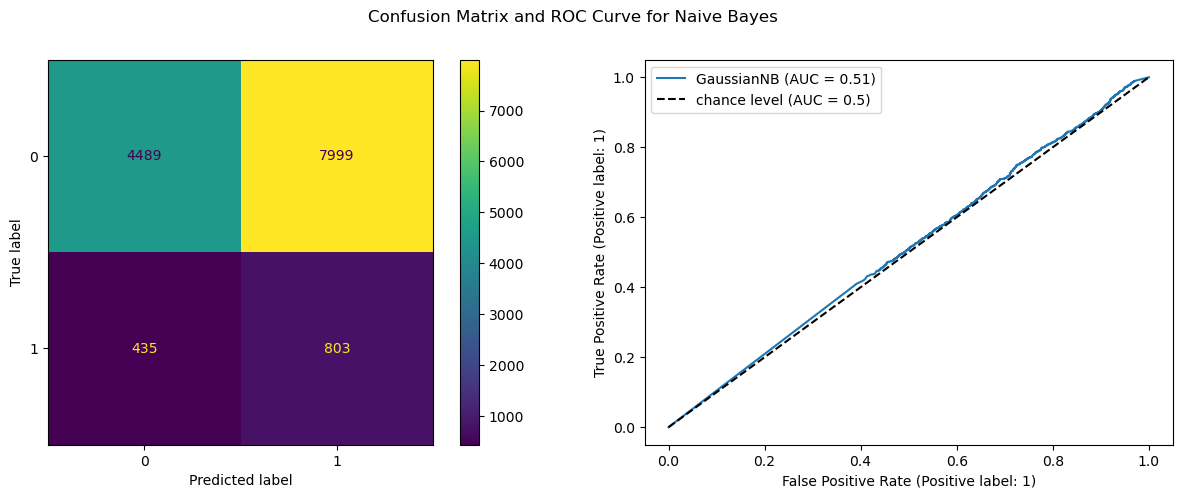

In [24]:

# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5),)
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for Naive Bayes')
cm = confusion_matrix(y_test,pred_vals['Naive Bayes'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict['Naive Bayes'], X_test, y_test,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


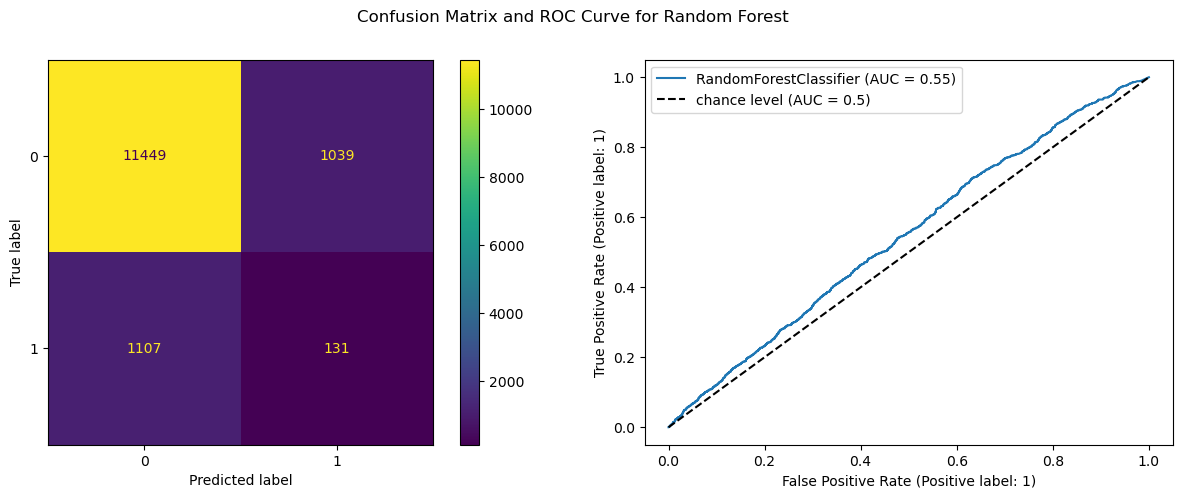

In [25]:

# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5),)
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for Random Forest')
cm = confusion_matrix(y_test,pred_vals['Random Forest'])
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict['Random Forest'], X_test, y_test,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend()


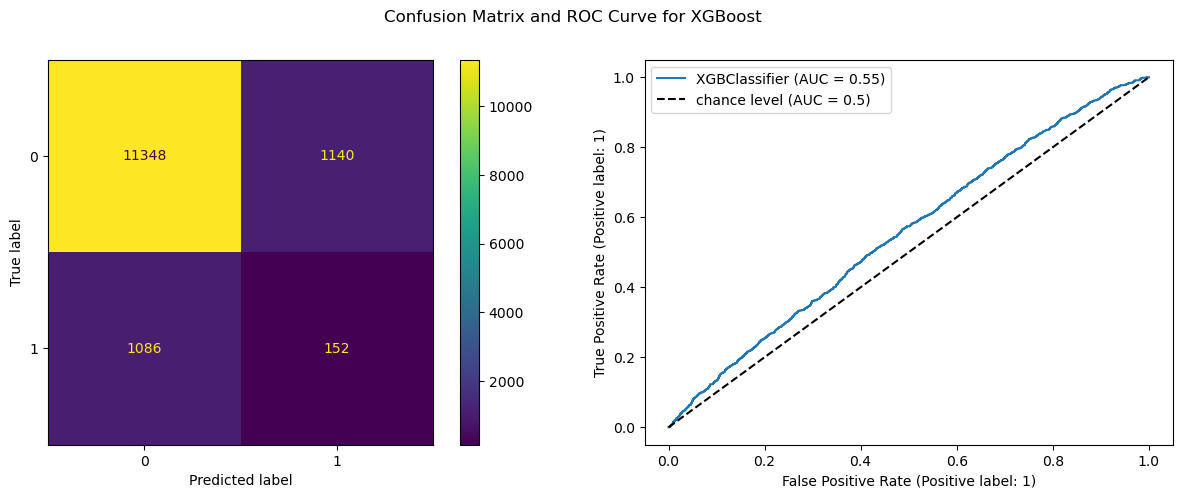

In [26]:

# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5),)
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)

plt.suptitle('Confusion Matrix and ROC Curve for XGBoost')
cm = confusion_matrix(y_test,pred_vals['XGBoost'])
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict['XGBoost'], X_test, y_test,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


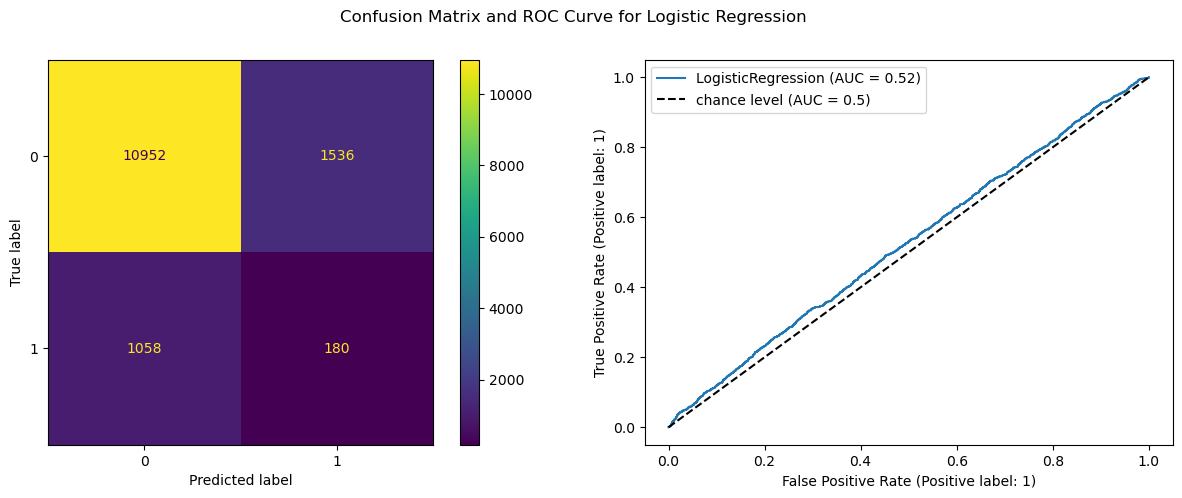

In [27]:

# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5),)
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)

plt.suptitle('Confusion Matrix and ROC Curve for Logistic Regression')
cm = confusion_matrix(y_test,pred_vals['Logistic Regression'])
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict['Logistic Regression'], X_test, y_test,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


* From the grpahs we can see that even though Naive Bayes gives us a good ROC, The models have poor precision and it is the model with the highest recall . But as the precision is poor it can be inferred that the model is predicting most of the values as the positive class
* The second best model which is KNN seems to have a good recall , but has better specificity ,indicating that it is able to predict the other class better

### Performance Metrics for Manual Oversampling on training Data

In [28]:
svm_cl = svm.SVC(C=1000,)

In [29]:
model_dict_svm={'KNN':kn,'Naive Bayes':gnb,'Random Forest':rf_cl,'XGBoost':xgb_cl,'Logistic Regression':lgr_cl,'SVM':svm_cl
}

In [30]:
X_train_man.shape

(6126, 68)

In [31]:
# Creating variables to store the evaluation metrics
acc=[]
recall=[]
prec=[]
spec=[]
f1=[]
pred_dic={}

for i in list(model_dict_svm.keys()):
    print('Performing Evaluation for {}'.format(i))
    #running the model through the model eval metrics function defined earlier 
    r,a,f,p,s,pred_vals=model_eval_metrics(model_dict_svm[i],X_train_man,y_train_man,X_test_man,y_test_man,i,pred_dic)
    acc.append(a)
    recall.append(r)
    prec.append(p)
    f1.append(f)
    spec.append(s)

Performing Evaluation for KNN
Performing Evaluation for Naive Bayes
Performing Evaluation for Random Forest
Performing Evaluation for XGBoost
Performing Evaluation for Logistic Regression
Performing Evaluation for SVM


In [32]:
df_manu_res=pd.DataFrame()
df_manu_res['Modes']=list(model_dict_svm.keys())
df_manu_res['Accuracy']=acc
df_manu_res['Precision(PPV)']=prec
df_manu_res['F1 Score']=f1
df_manu_res['recall']=recall
df_manu_res['Specificity']=spec

In [33]:
df_manu_res.to_csv(r'.\Results\results_final.csv',index=False)

In [34]:
df_manu_res

,Modes,Accuracy,Precision(PPV),F1 Score,recall,Specificity
0,KNN,0.534545,0.102166,0.170301,0.511263,0.536945
1,Naive Bayes,0.127597,0.094947,0.173076,0.977147,0.040040
2,Random Forest,0.583290,0.121284,0.199003,0.554032,0.586306
3,XGBoost,0.586005,0.124276,0.203895,0.567418,0.587921
4,Logistic Regression,0.646951,0.139639,0.221759,0.538361,0.658143
5,SVM,0.666840,0.143259,0.224180,0.515181,0.682470


* Logistic Regression has the best performing metrics with a recall of 58%  and accuracy of 65%
* Although Naive Bayes has the highest recall , the accuracy is very poor due to low precision
* Random Forest and XGBoost are very close in terms of performance and can be seen 

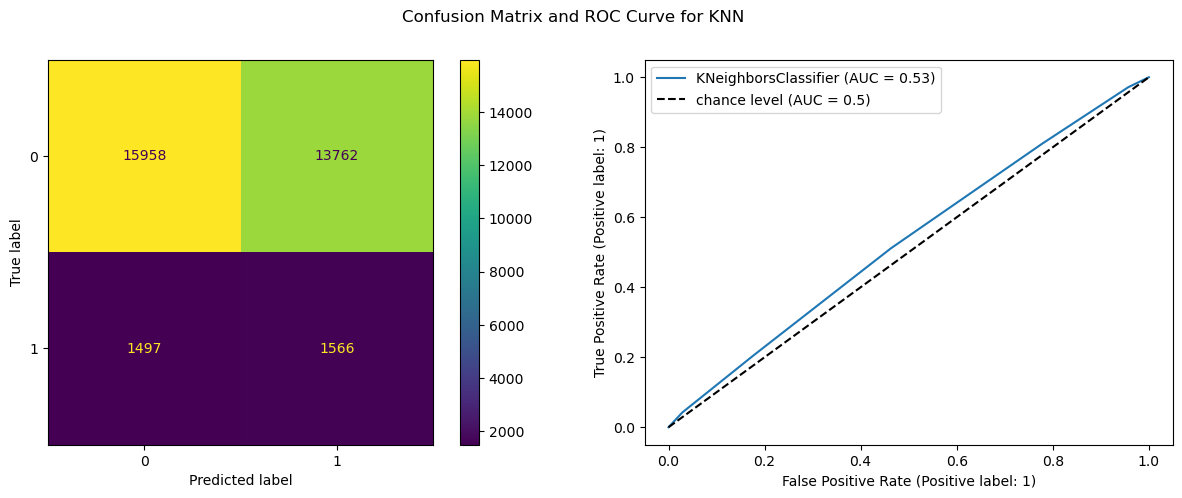

In [35]:
#pd.crosstab(pd.Series(y_test_og, name = 'Actual'), pd.Series(y_pred_rf_og, name = 'Predict'), margins = True)
# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for KNN')

cm = confusion_matrix(y_test_man,pred_vals['KNN'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict_svm['KNN'], X_test_man, y_test_man,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


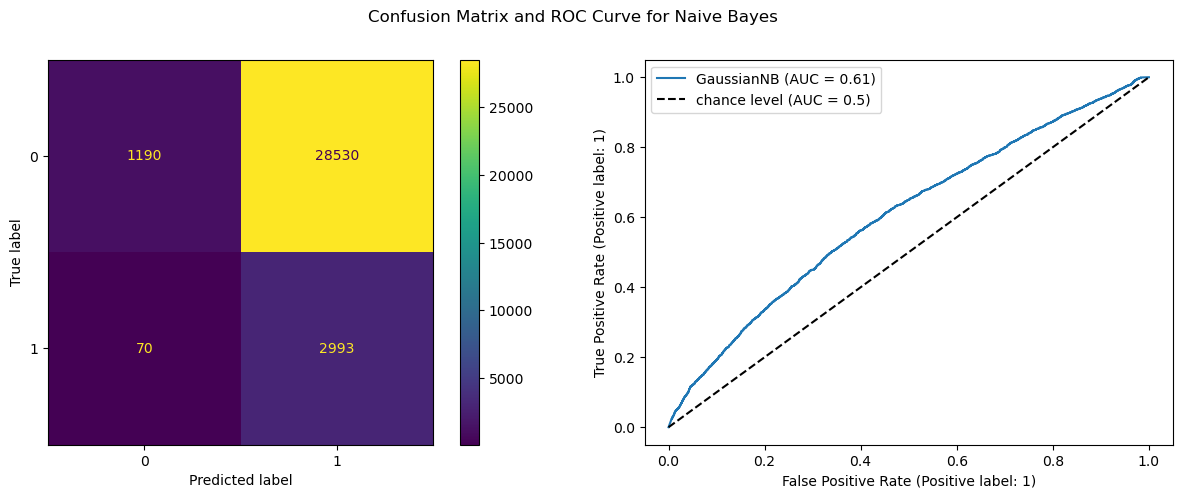

In [36]:
#pd.crosstab(pd.Series(y_test_og, name = 'Actual'), pd.Series(y_pred_rf_og, name = 'Predict'), margins = True)
# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for Naive Bayes')

cm = confusion_matrix(y_test_man,pred_vals['Naive Bayes'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict_svm['Naive Bayes'], X_test_man, y_test_man,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


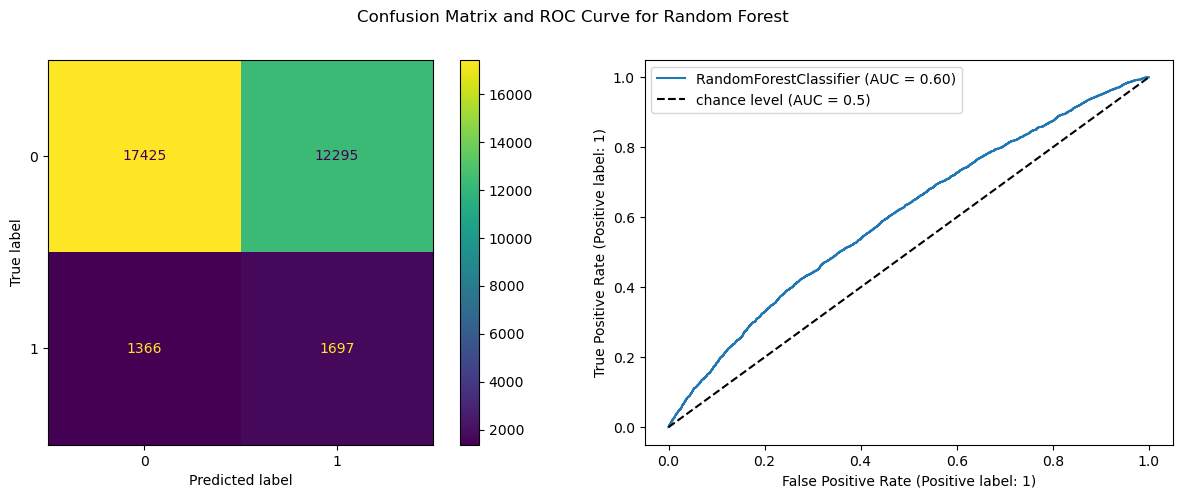

In [37]:
#pd.crosstab(pd.Series(y_test_og, name = 'Actual'), pd.Series(y_pred_rf_og, name = 'Predict'), margins = True)
# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for Random Forest')

cm = confusion_matrix(y_test_man,pred_vals['Random Forest'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict_svm['Random Forest'], X_test_man, y_test_man,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend()


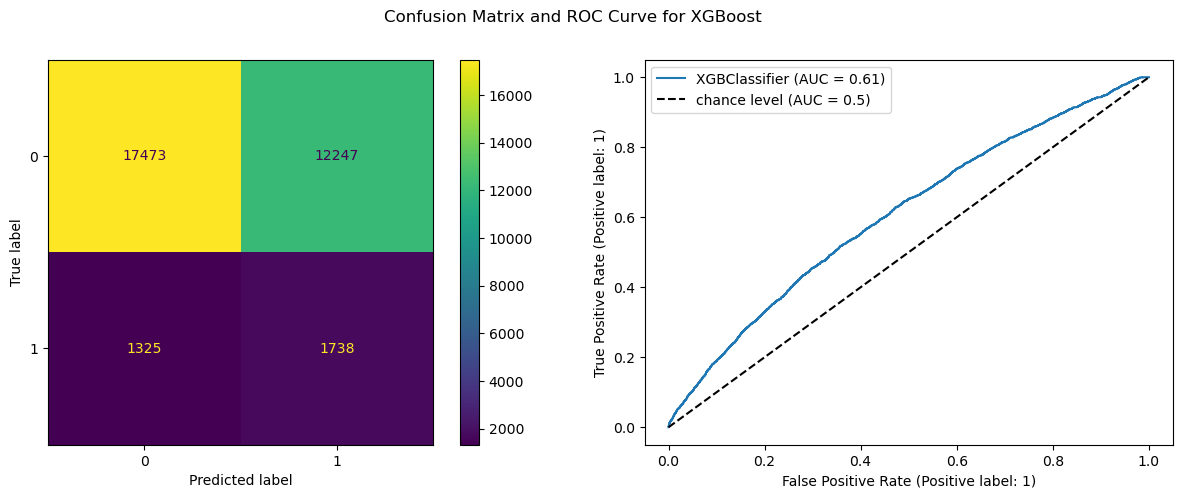

In [38]:
#pd.crosstab(pd.Series(y_test_og, name = 'Actual'), pd.Series(y_pred_rf_og, name = 'Predict'), margins = True)
# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for XGBoost')

cm = confusion_matrix(y_test_man,pred_vals['XGBoost'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict_svm['XGBoost'], X_test_man, y_test_man,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


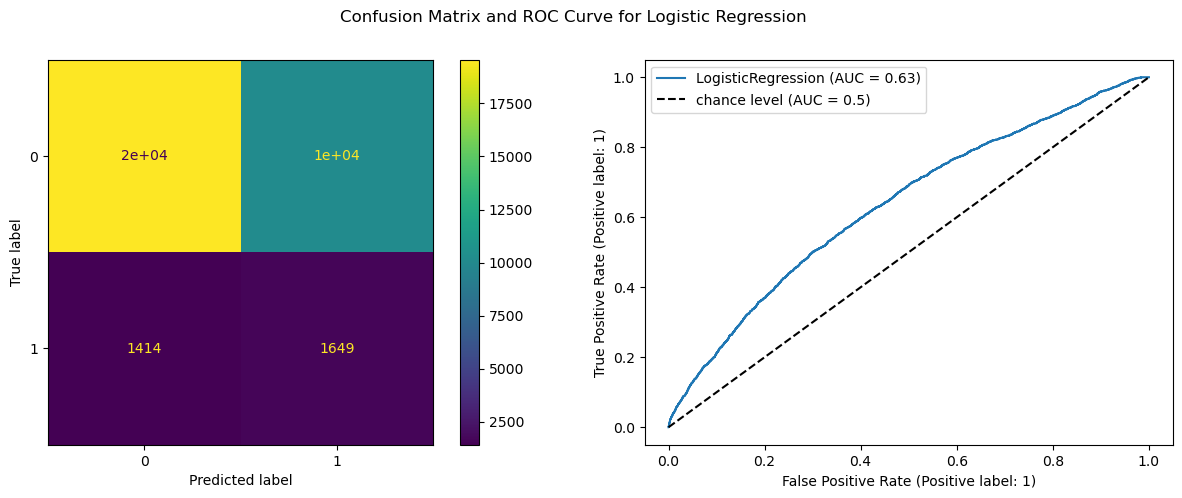

In [39]:
#pd.crosstab(pd.Series(y_test_og, name = 'Actual'), pd.Series(y_pred_rf_og, name = 'Predict'), margins = True)
# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for Logistic Regression')

cm = confusion_matrix(y_test_man,pred_vals['Logistic Regression'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict_svm['Logistic Regression'], X_test_man, y_test_man,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

plt.legend()


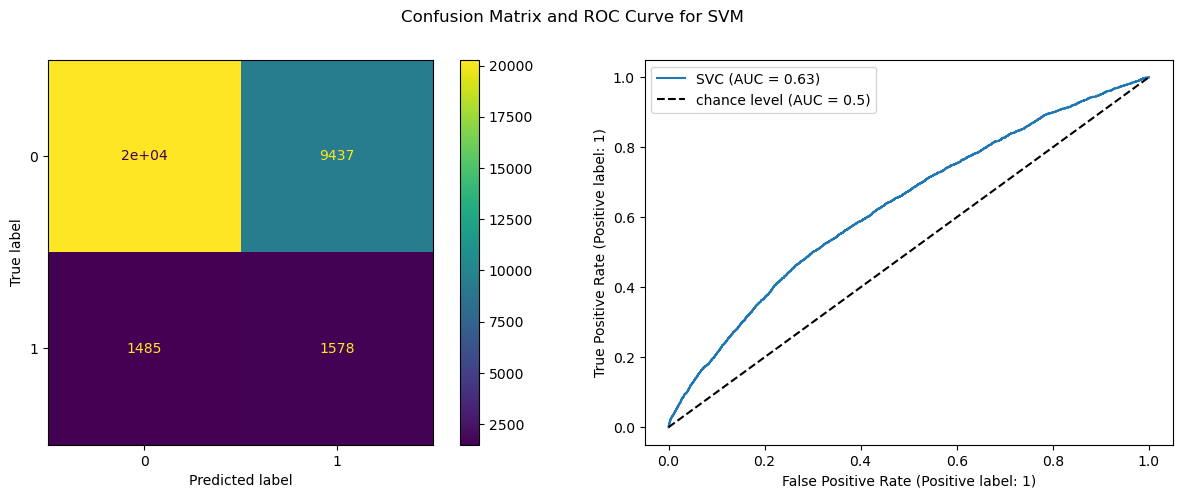

In [40]:
#pd.crosstab(pd.Series(y_test_og, name = 'Actual'), pd.Series(y_pred_rf_og, name = 'Predict'), margins = True)
# Generating Confusion matrix and ROC Curve plots 
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2= plt.subplot(1, 2, 2)
plt.suptitle('Confusion Matrix and ROC Curve for SVM')

cm = confusion_matrix(y_test_man,pred_vals['SVM'])
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(ax=ax1)


RocCurveDisplay.from_estimator(model_dict_svm['SVM'], X_test_man, y_test_man,ax=ax2)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend()


In [41]:
df_manu_res

,Modes,Accuracy,Precision(PPV),F1 Score,recall,Specificity
0,KNN,0.534545,0.102166,0.170301,0.511263,0.536945
1,Naive Bayes,0.127597,0.094947,0.173076,0.977147,0.040040
2,Random Forest,0.583290,0.121284,0.199003,0.554032,0.586306
3,XGBoost,0.586005,0.124276,0.203895,0.567418,0.587921
4,Logistic Regression,0.646951,0.139639,0.221759,0.538361,0.658143
5,SVM,0.666840,0.143259,0.224180,0.515181,0.682470


* SVM and logistic Regression are tied for the spot of bet model performance as per AUC from the plots above , But logisitics regression being interpretable and considering the context it can also be used to understand the effects of different features on patients outcomes seems like the better choice

## Using RFE to select the most important features in the dataset

In [42]:
# Intiating an instance for randomforest to perform RFE
estimator = RandomForestClassifier(n_estimators=10,max_depth=25,criterion='gini',min_samples_split=10)
selector = RFE(estimator, step=1,n_features_to_select=20)

In [43]:
selector.fit(X_train_man,y_train_man)

RFE(estimator=RandomForestClassifier(max_depth=25, min_samples_split=10,
                                     n_estimators=10),
    n_features_to_select=20)

In [44]:
# DIplaying the selected features 
pd.DataFrame(X_train.loc[:,selector.support_].columns)

,0
0,age
1,time_in_hospital
2,num_lab_procedures
3,num_procedures
4,num_medications
5,number_outpatient
6,number_emergency
7,number_inpatient
8,number_diagnoses
9,metformin


* The features selected contain all the numerical variables,and also include vairbales such as if the patient was prescribed insulin 
* A1C result although being mostly empty has been identified as an important column 

#### Checking the feature importance using the Random Forest Model which was generated during the implementation

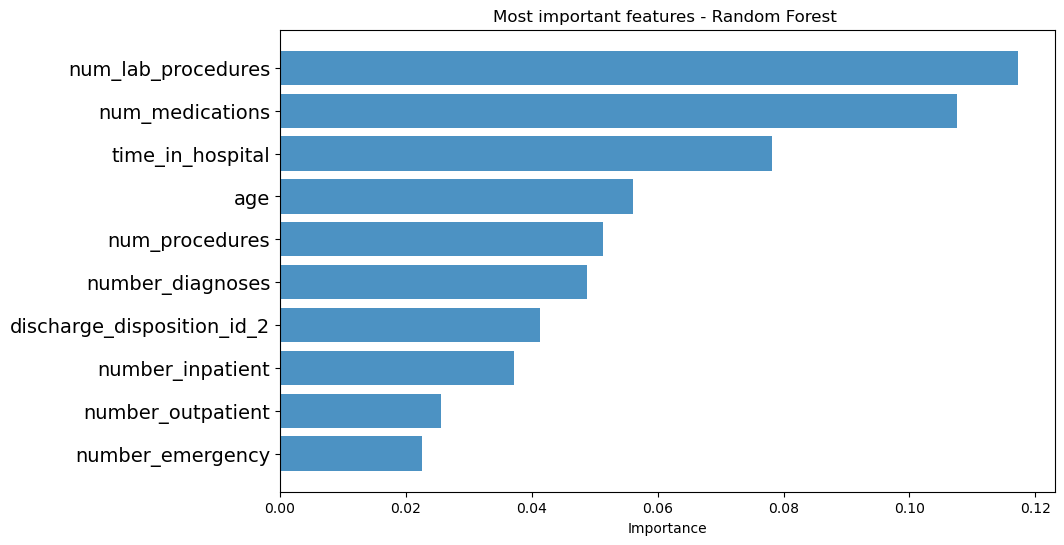

In [45]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = model_dict_svm['Random Forest'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

* Here too the numerical columns have been given the highest weightage although not considerably high 
* Gender is seen to coincide with the other result generated from RFE too  

### As KNN uses distance and numerical features have been estimated to be contributing significantly to the model performance , Scaling the features and applying gridsearcv to optimise the paarameters in KNN

In [46]:
#Scaling only the numerical columns in the dataset
scaler = MinMaxScaler()
scaler.fit(X_train_man[num_columns])
X_train_man_scaled=X_train_man.copy()
X_test_man_scaled=X_test_man.copy()
X_train_man_scaled[num_columns]=scaler.transform(X_train_man[num_columns])
X_test_man_scaled[num_columns]=scaler.transform(X_test_man[num_columns])

In [47]:
# Defining the parameters for gridsearch
parameters = {'n_neighbors':[4,5,6,7,8], 'weights':('uniform', 'distance'),'algorithm':('ball_tree', 'kd_tree', 'brute')}

In [48]:
# Setting up the class and also setting the scoring to accuracy
knn = KNeighborsClassifier()
grdcv = GridSearchCV(knn, parameters,scoring='accuracy',verbose=4,cv=3)

In [49]:
grdcv.fit(X_train_man_scaled,y_train_man)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.515 total time=   0.4s
[CV 2/3] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.534 total time=   0.4s
[CV 3/3] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.518 total time=   0.4s
[CV 1/3] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.519 total time=   0.4s
[CV 2/3] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.545 total time=   0.4s
[CV 3/3] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.528 total time=   0.4s
[CV 1/3] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.522 total time=   0.4s
[CV 2/3] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.547 total time=   0.4s
[CV 3/3] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.517 total time=   0.4s
[CV 1/3] END algorithm=ball_tree, n_neighbors=5, weigh

C:\Users\Puru\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)

C:\Users\Puru\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)

[CV 2/3] END algorithm=brute, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 1/3] END algorithm=brute, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 2/3] END algorithm=brute, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 1/3] END algorithm=brute, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 2/3] END algorithm=brute, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 1/3] END algorithm=brute, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 2/3] END algorithm=brute, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=7, weights=distance;, score=nan t

C:\Users\Puru\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Puru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [4, 5, 6, 7, 8],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [50]:
grdcv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, weights='distance')

In [51]:
# Evaluating the best estimator obtained through gridsearch Cross Validation
y_pred_dc=grdcv.best_estimator_.predict(X_test_man_scaled)
print('Recall Score/Sensitivity :', recall_score(y_test_man, y_pred_dc))
print('Accuracy Score : ',accuracy_score(y_test_man, y_pred_dc))
print('F1 Score :',f1_score(y_test_man,y_pred_dc))
print('Precision/PPV',precision_score(y_test_man,y_pred_dc))
print('Specificity',recall_score(y_test_man, y_pred_dc,pos_label=0))

Recall Score/Sensitivity : 0.544564152791381
Accuracy Score :  0.5485465027605771
F1 Score : 0.18394353771504188
Precision/PPV 0.110661447621575
Specificity 0.548956931359354


* KNN with tuned hyperparameters gives a very balanced classifier with recall and accuracy around 55% , Hyperparameter tuning has definitely improved performance of the model slightly from before